In [7]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math


In [8]:
df=pd.read_excel('C:\\Users\\suyas\\OneDrive\\Desktop\\Accelerometer.xlsx')
df

,Timestamp,Milliseconds,X,Y,Z
0,2022-11-03 22:54:24,1.0,-2.568978,6.327875,5.537788
1,2022-11-03 22:54:26,1502.0,-1.448492,6.478710,6.938396
2,2022-11-03 22:54:27,3002.0,1.022324,5.975927,8.631097
3,2022-11-03 22:54:29,4501.0,-2.564190,6.603208,11.324574
4,2022-11-03 22:54:30,6001.0,-0.265756,6.806716,7.481880
...,...,...,...,...,...
167,2022-11-03 22:58:35,250502.0,-3.624821,5.616797,10.237606
168,2022-11-03 22:58:36,252001.0,-0.696713,4.632780,7.917625
169,2022-11-03 22:58:38,253502.0,-0.067038,5.748478,7.211336
170,2022-11-03 22:58:39,255001.0,-1.120486,6.579266,6.100426


In [9]:
df.describe()

,Milliseconds,X,Y,Z
count,172.000000,172.000000,172.000000,172.000000
mean,128251.395349,0.018193,6.434598,7.193643
std,74694.365087,3.904594,3.757156,2.625133
min,1.000000,-15.849615,-31.490934,-2.384625
25%,64126.250000,-1.443105,5.747880,5.647922
50%,128251.500000,-0.187945,6.591237,7.161058
75%,192376.250000,0.980426,7.754819,8.726865
max,256501.000000,40.775650,20.570980,20.791248


In [10]:
df.isnull()

,Timestamp,Milliseconds,X,Y,Z
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
167,False,False,False,False,False
168,False,False,False,False,False
169,False,False,False,False,False
170,False,False,False,False,False


C:\Users\suyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\suyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\suyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='Z', ylabel='Density'>

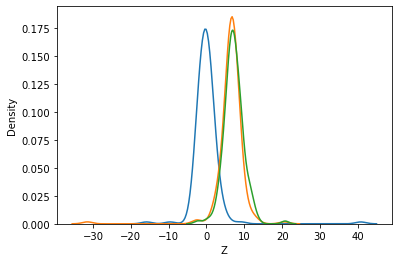

In [11]:

sns.distplot(df['X'],hist=False)
sns.distplot(df['Y'],hist=False)
sns.distplot(df['Z'],hist=False)

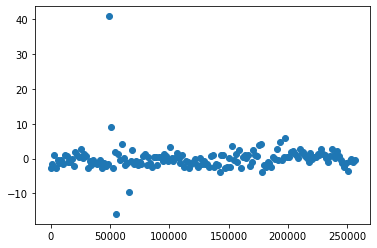

In [12]:
time=df['Milliseconds']
x1=df['X']
plt.scatter(time,x1)

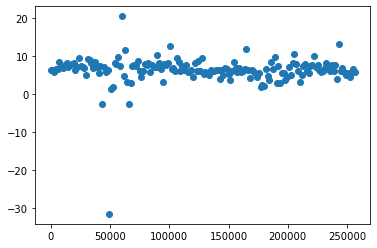

In [13]:
time=df['Milliseconds']
x2=df['Y']
plt.scatter(time,x2)

In [14]:
asdf=df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
df['g_force']=asdf**0.5
df

,Timestamp,Milliseconds,X,Y,Z,g_force
0,2022-11-03 22:54:24,1.0,-2.568978,6.327875,5.537788,8.792540
1,2022-11-03 22:54:26,1502.0,-1.448492,6.478710,6.938396,9.602768
2,2022-11-03 22:54:27,3002.0,1.022324,5.975927,8.631097,10.547639
3,2022-11-03 22:54:29,4501.0,-2.564190,6.603208,11.324574,13.357522
4,2022-11-03 22:54:30,6001.0,-0.265756,6.806716,7.481880,10.118326
...,...,...,...,...,...,...
167,2022-11-03 22:58:35,250502.0,-3.624821,5.616797,10.237606,12.226869
168,2022-11-03 22:58:36,252001.0,-0.696713,4.632780,7.917625,9.199829
169,2022-11-03 22:58:38,253502.0,-0.067038,5.748478,7.211336,9.222411
170,2022-11-03 22:58:39,255001.0,-1.120486,6.579266,6.100426,9.041981


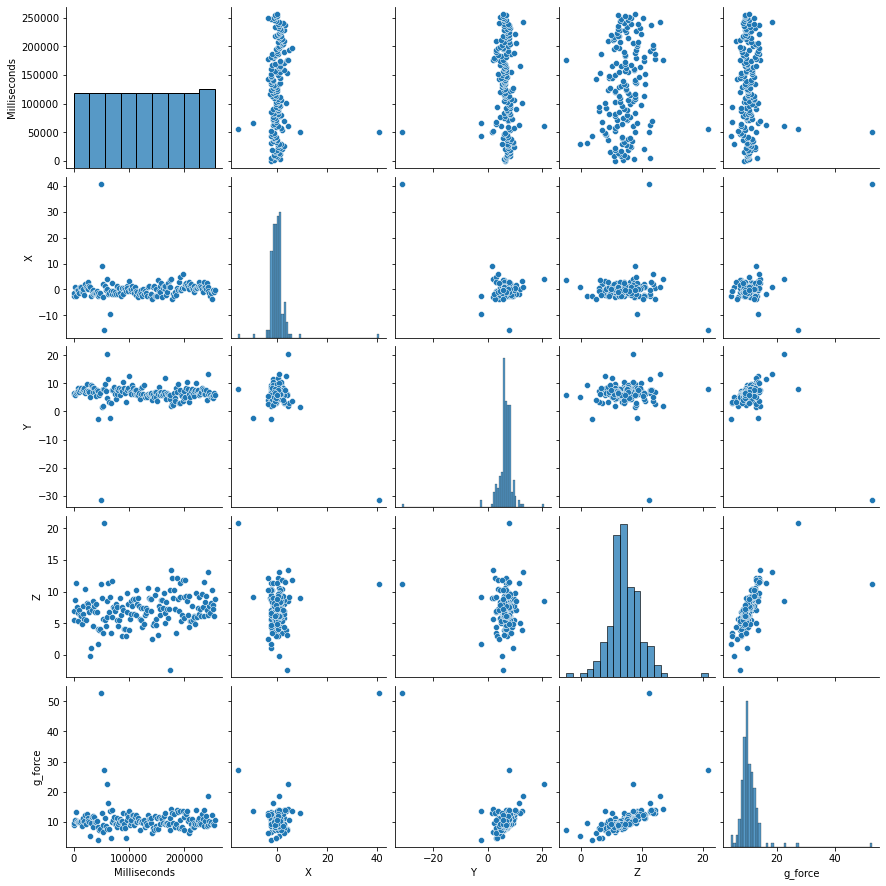

In [15]:
sns.pairplot(df)

In [16]:
a=list()
for i in  df['g_force']:
    a.append(i)
a

[8.792539558322751,
 9.60276806145761,
 10.547639085545189,
 13.357522319982849,
 10.118326477065326,
 10.023326244971342,
 9.787478398821897,
 9.994247124645568,
 9.941711970628567,
 10.344223774831189,
 8.688724685749857,
 10.187575728427712,
 11.22480033431093,
 10.20397542501429,
 12.420411961116866,
 9.256018705211883,
 12.681126652200135,
 11.281853934251838,
 10.36682880376179,
 9.831334024356169,
 5.1600360385332795,
 9.696936885519275,
 11.60144912978261,
 11.959430326982483,
 8.299800879144206,
 11.473069364521345,
 9.936280187204819,
 9.919118342153418,
 10.122928744353912,
 4.114392955162579,
 8.310428236749548,
 7.398566380872062,
 7.717466039734827,
 52.73018500398852,
 12.854256417522603,
 6.562797704877094,
 9.051750077865352,
 27.31412433173443,
 11.28081938544241,
 8.705387165209563,
 22.632192906358394,
 7.640431549293607,
 16.365220604005113,
 7.575881582801721,
 13.508362709801844,
 4.571434612348316,
 14.069494255439922,
 9.892402574096746,
 10.60793609302183,
 11

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='g_force', ylabel='Density'>

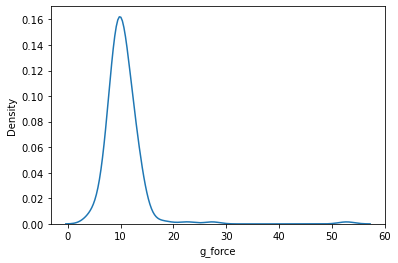

In [17]:
sns.distplot(df['g_force'],hist=False)

In [18]:
list2=list()
for i in a:
    if(i>=4.114392955162579 and i<=9.99943291582333):
        list2.append(0)
    elif i>=10.023326244971342 and i<=14.174987323650099 :
        list2.append(1)
    else :
        list2.append(2)

In [19]:
list2

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1]

In [20]:
df['crash']=list2
df

,Timestamp,Milliseconds,X,Y,Z,g_force,crash
0,2022-11-03 22:54:24,1.0,-2.568978,6.327875,5.537788,8.792540,0
1,2022-11-03 22:54:26,1502.0,-1.448492,6.478710,6.938396,9.602768,0
2,2022-11-03 22:54:27,3002.0,1.022324,5.975927,8.631097,10.547639,1
3,2022-11-03 22:54:29,4501.0,-2.564190,6.603208,11.324574,13.357522,1
4,2022-11-03 22:54:30,6001.0,-0.265756,6.806716,7.481880,10.118326,1
...,...,...,...,...,...,...,...
167,2022-11-03 22:58:35,250502.0,-3.624821,5.616797,10.237606,12.226869,1
168,2022-11-03 22:58:36,252001.0,-0.696713,4.632780,7.917625,9.199829,0
169,2022-11-03 22:58:38,253502.0,-0.067038,5.748478,7.211336,9.222411,0
170,2022-11-03 22:58:39,255001.0,-1.120486,6.579266,6.100426,9.041981,0


In [21]:
x=df.drop(columns=['crash','Timestamp'])
x

,Milliseconds,X,Y,Z,g_force
0,1.0,-2.568978,6.327875,5.537788,8.792540
1,1502.0,-1.448492,6.478710,6.938396,9.602768
2,3002.0,1.022324,5.975927,8.631097,10.547639
3,4501.0,-2.564190,6.603208,11.324574,13.357522
4,6001.0,-0.265756,6.806716,7.481880,10.118326
...,...,...,...,...,...
167,250502.0,-3.624821,5.616797,10.237606,12.226869
168,252001.0,-0.696713,4.632780,7.917625,9.199829
169,253502.0,-0.067038,5.748478,7.211336,9.222411
170,255001.0,-1.120486,6.579266,6.100426,9.041981


In [22]:
y=df['crash']
y

0      0
1      0
2      1
3      1
4      1
      ..
167    1
168    0
169    0
170    0
171    1
Name: crash, Length: 172, dtype: int64

In [23]:
df0=df[df['crash']==0]
df1=df[df['crash']==1]
df2=df[df['crash']==2]


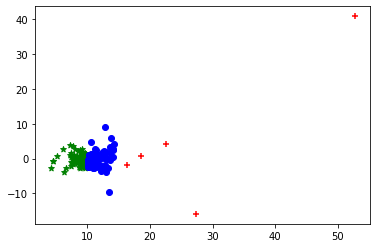

In [24]:
plt.scatter(df0['g_force'],df0['X'],color='green',marker='*')
plt.scatter(df1['g_force'],df1['X'],color='blue')
plt.scatter(df2['g_force'],df2['X'],color='red',marker='+')

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [26]:
len(x_train)

129

In [27]:
len(x_test)

43

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf=DecisionTreeClassifier()

In [30]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
type(df)

pandas.core.frame.DataFrame

[Text(0.4, 0.8333333333333334, 'X[4] <= 10.011\ngini = 0.521\nsamples = 129\nvalue = [66, 60, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 66\nvalue = [66, 0, 0]'),
 Text(0.6, 0.5, 'X[4] <= 16.345\ngini = 0.091\nsamples = 63\nvalue = [0, 60, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 60\nvalue = [0, 60, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]')]

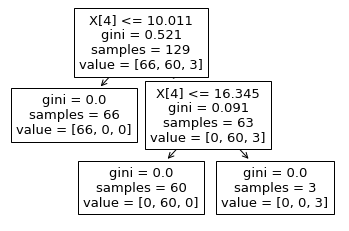

In [32]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [33]:
clf.score(x_test,y_test)

1.0

In [34]:
y_predict=clf.predict(x_test)
y_predict

array([1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [35]:
from sklearn.svm import SVC
model=SVC()

In [36]:
model.fit(x_train,y_train)

SVC()

In [37]:
model.score(x_test,y_test)

0.5116279069767442

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
reg_rand = RandomForestClassifier(n_estimators=100)
reg_rand.fit(x_train,y_train)



RandomForestClassifier()

In [40]:
reg_rand.score(x_test,y_test)

0.9534883720930233

In [42]:
import pickle
pickle.dump(reg_rand ,open('model.pkl','wb'))